In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
from dateutil import parser

In [3]:
df = pd.read_excel('raw_data_feng.xlsx')
df.head()

,address,unit_no,street_no,street_name,suburb,state,post_code,rent_numeric,beds,baths,parking,available_date_converted,days_listed
0,"7/38A Ewart Street, Marrickville NSW 2204",7.0,38A,Ewart Street,Marrickville,NSW,2204,630,2,1,0,2024-01-15,7
1,"A604/2 Oliver Road, Chatswood NSW 2067",NaN,NaN,NaN,Chatswood,NSW,2067,850,2,2,1,2024-01-15,11
2,"513/11A Lachlan Street, Waterloo NSW 2017",513.0,11A,Lachlan Street,Waterloo,NSW,2017,900,2,2,1,2024-01-15,11
3,"46/6-8 Nile Close, Marsfield NSW 2122",46.0,6-8,Nile Close,Marsfield,NSW,2122,620,2,2,1,2024-01-15,6
4,"210/27 Hill Road, Wentworth Point NSW 2127",210.0,27,Hill Road,Wentworth Point,NSW,2127,730,2,1,1,2024-01-15,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   address                   743 non-null    object        
 1   unit_no                   594 non-null    float64       
 2   street_no                 686 non-null    object        
 3   street_name               686 non-null    object        
 4   suburb                    743 non-null    object        
 5   state                     743 non-null    object        
 6   post_code                 743 non-null    int64         
 7   rent_numeric              743 non-null    int64         
 8   beds                      743 non-null    int64         
 9   baths                     743 non-null    int64         
 10  parking                   743 non-null    int64         
 11  available_date_converted  715 non-null    datetime64[ns]
 12  days_listed           

In [5]:
df['post_code'].unique()

array([2204, 2067, 2017, 2122, 2127, 2009, 2137, 2036, 2050, 2000, 2022,
       2011, 2065, 2133, 2037, 2025, 2016, 2040, 2008, 2021, 2114, 2095,
       2118, 2620, 2026, 2110, 2064, 2131, 2061, 2193, 2046, 2216, 2010,
       2039, 2203, 2033, 2154, 2134, 2121, 2007, 2024, 2068, 2140, 2031,
       2042, 2060, 2043, 2138, 2220, 2088, 2090, 2289, 2315, 2106, 2135,
       2196, 2034, 2756, 2160, 2035, 2018, 2150, 2210, 2325, 2195, 2027,
       2023, 2015, 2205, 2112, 2049, 2155, 2230, 2028, 2062, 2020, 2073,
       2113, 2136, 2030, 2151, 2044, 2071, 2029, 2089, 2066, 2153, 2747,
       2261, 2194, 2048, 2077, 2208, 2101, 2300, 2228, 2170, 2041, 2069,
       2132, 2070, 2145, 2206, 2444, 2502, 2111, 2115, 2296, 2047, 2074,
       2094, 2223, 2293, 2304, 2130, 2099, 2096, 2640, 2103, 2085, 2762,
       2038, 2019, 2032], dtype=int64)

In [6]:
# Keep only rows where 'post_code' is a digit
df = df[df['post_code'].apply(lambda x:str(x).isdigit())]

In [7]:
df.shape

(743, 13)

In [8]:
df.style

,address,unit_no,street_no,street_name,suburb,state,post_code,rent_numeric,beds,baths,parking,available_date_converted,days_listed
0,"7/38A Ewart Street, Marrickville NSW 2204",7.000000,38A,Ewart Street,Marrickville,NSW,2204,630,2,1,0,2024-01-15 00:00:00,7
1,"A604/2 Oliver Road, Chatswood NSW 2067",nan,nan,nan,Chatswood,NSW,2067,850,2,2,1,2024-01-15 00:00:00,11
2,"513/11A Lachlan Street, Waterloo NSW 2017",513.000000,11A,Lachlan Street,Waterloo,NSW,2017,900,2,2,1,2024-01-15 00:00:00,11
3,"46/6-8 Nile Close, Marsfield NSW 2122",46.000000,6-8,Nile Close,Marsfield,NSW,2122,620,2,2,1,2024-01-15 00:00:00,6
4,"210/27 Hill Road, Wentworth Point NSW 2127",210.000000,27,Hill Road,Wentworth Point,NSW,2127,730,2,1,1,2024-01-15 00:00:00,4
5,"50 Murray Street, Pyrmont NSW 2009",nan,50,Murray Street,Pyrmont,NSW,2009,1100,2,2,1,2024-01-15 00:00:00,14
6,"12/1 Corby Avenue, Concord NSW 2137",12.000000,1,Corby Avenue,Concord,NSW,2137,550,2,1,1,2024-01-15 00:00:00,5
7,"7/526 Bunnerong Road, Matraville NSW 2036",7.000000,526,Bunnerong Road,Matraville,NSW,2036,740,2,2,1,2024-01-15 00:00:00,11
8,"12/16-22 Australia Street, Camperdown NSW 2050",12.000000,16-22,Australia Street,Camperdown,NSW,2050,775,2,1,1,2024-01-15 00:00:00,12
9,"Level5/25 Barangaroo Avenue, Barangaroo NSW 2000",nan,nan,nan,Barangaroo,NSW,2000,1450,1,1,1,2024-01-15 00:00:00,13


In [9]:
df['post_code'].isnull().sum()

0

In [10]:
df['state'].isnull().sum()

0

In [11]:
df['suburb'].isnull().sum()

0

In [12]:
df['state'].unique()

array(['NSW'], dtype=object)

In [13]:
df['suburb'].unique()

array(['Marrickville', 'Chatswood', 'Waterloo', 'Marsfield',
       'Wentworth Point', 'Pyrmont', 'Concord', 'Matraville',
       'Camperdown', 'Barangaroo', 'Bondi Junction', 'Potts Point',
       'St Leonards', 'Croydon Park', 'Glebe', 'Woollahra', 'Redfern',
       'Leichhardt', 'Sydney Olympic Park', 'Eastwood', 'Chippendale',
       'Paddington', 'Meadowbank', 'Manly', 'Carlingford', 'Crestwood',
       'Bondi Beach', 'Hunters Hill', 'Artarmon', 'Ashfield',
       'Kirribilli', 'Queanbeyan', 'Canterbury', 'Five Dock', 'Rockdale',
       'Woolwich', 'Surry Hills', 'Rozelle', 'Bondi', 'Dulwich Hill',
       'Kensington', 'Castle Hill', 'Zetland', 'Canada Bay', 'Burwood',
       'Epping', 'Mortlake', 'Milsons Point', 'Ultimo', 'Bronte',
       'Darlinghurst', 'Willoughby', 'Homebush West', 'Randwick',
       'Newtown', 'North Sydney', 'Erskineville', 'Rhodes', 'Crows Nest',
       'Hurstville', 'Mosman', 'Elizabeth Bay', 'Cremorne', 'Adamstown',
       'Shoal Bay', 'Newport', 'Centen

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 742
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   address                   743 non-null    object        
 1   unit_no                   594 non-null    float64       
 2   street_no                 686 non-null    object        
 3   street_name               686 non-null    object        
 4   suburb                    743 non-null    object        
 5   state                     743 non-null    object        
 6   post_code                 743 non-null    int64         
 7   rent_numeric              743 non-null    int64         
 8   beds                      743 non-null    int64         
 9   baths                     743 non-null    int64         
 10  parking                   743 non-null    int64         
 11  available_date_converted  715 non-null    datetime64[ns]
 12  days_listed           

In [15]:
df['rent_numeric'].unique()

array([ 630,  850,  900,  620,  730, 1100,  550,  740,  775, 1450,  695,
       1250,  750,  700,  400,  680,  925,  825,  780,  650,  610,  995,
        430, 1200, 1550,  675,  800,  840,  530, 1350, 1050,  580, 1400,
        660,  950,  790,  830,  490,  570,  720, 1150,  875,  685,  600,
        640,  945,  895, 1000,  990,  715,  690,  725,  590,  495,  420,
       1180,  795,  885,  360,  440, 1680,  500,  250,  880,  820, 1025,
       1900, 2000,  320,  595, 1700, 1500,  890, 1300,  980,  525,  770,
       1850, 2100, 2250, 3900, 1600, 1095,  745,  635,  860,  845,  670,
       1295,  450,  930,  870,  485,  960, 3600, 1030,  480,  785,  510,
        520,  975,  370,  920, 1800,  560, 1650,  300, 1275,    1,  475,
       1380, 2300, 1140,  760, 1110,  625,  540,  460,  280, 1750,  735,
        705,  710], dtype=int64)

In [16]:
df['rent_numeric'].isnull().sum()

0

In [17]:
df = df.dropna(subset=['rent_numeric'])
print('the null value of rent:',df['rent_numeric'].isnull().sum())
df.info()

the null value of rent: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 742
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   address                   743 non-null    object        
 1   unit_no                   594 non-null    float64       
 2   street_no                 686 non-null    object        
 3   street_name               686 non-null    object        
 4   suburb                    743 non-null    object        
 5   state                     743 non-null    object        
 6   post_code                 743 non-null    int64         
 7   rent_numeric              743 non-null    int64         
 8   beds                      743 non-null    int64         
 9   baths                     743 non-null    int64         
 10  parking                   743 non-null    int64         
 11  available_date_converted  715 non-null    datetime64[ns]
 

In [18]:
print('null value of beds:',df['beds'].isnull().sum())
print('null value of baths:',df['baths'].isnull().sum())
print('null value of parking:',df['parking'].isnull().sum())

null value of beds: 0
null value of baths: 0
null value of parking: 0


In [19]:
print('null value of days_listed:',df['days_listed'].isnull().sum())

null value of days_listed: 0


In [20]:
df['days_listed'].unique()

array([ 7, 11,  6,  4, 14,  5, 12, 13, 28, 26, 27,  8, 19, 25,  3,  9, 16,
       10, 18, 24, 17, 29, 23,  2], dtype=int64)

In [21]:
df = df.dropna(subset=['days_listed'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 742
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   address                   743 non-null    object        
 1   unit_no                   594 non-null    float64       
 2   street_no                 686 non-null    object        
 3   street_name               686 non-null    object        
 4   suburb                    743 non-null    object        
 5   state                     743 non-null    object        
 6   post_code                 743 non-null    int64         
 7   rent_numeric              743 non-null    int64         
 8   beds                      743 non-null    int64         
 9   baths                     743 non-null    int64         
 10  parking                   743 non-null    int64         
 11  available_date_converted  715 non-null    datetime64[ns]
 12  days_listed           

In [23]:
df.head()

,address,unit_no,street_no,street_name,suburb,state,post_code,rent_numeric,beds,baths,parking,available_date_converted,days_listed
0,"7/38A Ewart Street, Marrickville NSW 2204",7.0,38A,Ewart Street,Marrickville,NSW,2204,630,2,1,0,2024-01-15,7
1,"A604/2 Oliver Road, Chatswood NSW 2067",NaN,NaN,NaN,Chatswood,NSW,2067,850,2,2,1,2024-01-15,11
2,"513/11A Lachlan Street, Waterloo NSW 2017",513.0,11A,Lachlan Street,Waterloo,NSW,2017,900,2,2,1,2024-01-15,11
3,"46/6-8 Nile Close, Marsfield NSW 2122",46.0,6-8,Nile Close,Marsfield,NSW,2122,620,2,2,1,2024-01-15,6
4,"210/27 Hill Road, Wentworth Point NSW 2127",210.0,27,Hill Road,Wentworth Point,NSW,2127,730,2,1,1,2024-01-15,4


In [24]:
df.reset_index(inplace=True,drop=True)
df

,address,unit_no,street_no,street_name,suburb,state,post_code,rent_numeric,beds,baths,parking,available_date_converted,days_listed
0,"7/38A Ewart Street, Marrickville NSW 2204",7.0,38A,Ewart Street,Marrickville,NSW,2204,630,2,1,0,2024-01-15,7
1,"A604/2 Oliver Road, Chatswood NSW 2067",NaN,NaN,NaN,Chatswood,NSW,2067,850,2,2,1,2024-01-15,11
2,"513/11A Lachlan Street, Waterloo NSW 2017",513.0,11A,Lachlan Street,Waterloo,NSW,2017,900,2,2,1,2024-01-15,11
3,"46/6-8 Nile Close, Marsfield NSW 2122",46.0,6-8,Nile Close,Marsfield,NSW,2122,620,2,2,1,2024-01-15,6
4,"210/27 Hill Road, Wentworth Point NSW 2127",210.0,27,Hill Road,Wentworth Point,NSW,2127,730,2,1,1,2024-01-15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,"1805/184 Forbes Street, Darlinghurst NSW 2010",1805.0,184,Forbes Street,Darlinghurst,NSW,2010,950,1,1,1,NaT,25
739,"22/110 Wellington Street, Waterloo NSW 2017",22.0,110,Wellington Street,Waterloo,NSW,2017,850,2,1,1,NaT,27
740,"48 Sloane Street, Summer Hill NSW 2130",NaN,48,Sloane Street,Summer Hill,NSW,2130,650,2,1,1,NaT,5
741,"3/58a Flinders St, Darlinghurst NSW 2010",3.0,58a,Flinders St,Darlinghurst,NSW,2010,800,2,1,1,NaT,6


In [25]:
# Calculate IQR for rent_numeric and days_listed
Q1_rent = df['rent_numeric'].quantile(0.25)
Q3_rent = df['rent_numeric'].quantile(0.75)
IQR_rent = Q3_rent - Q1_rent

Q1_days = df['days_listed'].quantile(0.25)
Q3_days = df['days_listed'].quantile(0.75)
IQR_days = Q3_days - Q1_days

# Determine threshold values (adjust as needed)
rent_threshold = 1.5 * IQR_rent
days_threshold = 1.5 * IQR_days

# Create new columns based on thresholds
df['reasonable_rent'] = (df['rent_numeric'] >= (Q1_rent - rent_threshold)) & (df['rent_numeric'] <= (Q3_rent + rent_threshold))
df['reasonable_days'] = (df['days_listed'] >= (Q1_days - days_threshold)) & (df['days_listed'] <= (Q3_days + days_threshold))

# Analyze the distribution of outcomes
print("Distribution of Reasonable Rent:")
print(df['reasonable_rent'].value_counts())

print("\nDistribution of Reasonable Days Listed:")
print(df['reasonable_days'].value_counts())


Distribution of Reasonable Rent:
True     706
False     37
Name: reasonable_rent, dtype: int64

Distribution of Reasonable Days Listed:
True     677
False     66
Name: reasonable_days, dtype: int64


In [26]:
# Create an overall reasonableness column
df['overall_reasonableness'] = (df['reasonable_rent'] & df['reasonable_days']).astype(int)

# Analyze the distribution of the overall reasonableness column
print("Distribution of Overall Reasonableness:")
print(df['overall_reasonableness'].value_counts())

Distribution of Overall Reasonableness:
1    649
0     94
Name: overall_reasonableness, dtype: int64


In [27]:
df

,address,unit_no,street_no,street_name,suburb,state,post_code,rent_numeric,beds,baths,parking,available_date_converted,days_listed,reasonable_rent,reasonable_days,overall_reasonableness
0,"7/38A Ewart Street, Marrickville NSW 2204",7.0,38A,Ewart Street,Marrickville,NSW,2204,630,2,1,0,2024-01-15,7,True,True,1
1,"A604/2 Oliver Road, Chatswood NSW 2067",NaN,NaN,NaN,Chatswood,NSW,2067,850,2,2,1,2024-01-15,11,True,True,1
2,"513/11A Lachlan Street, Waterloo NSW 2017",513.0,11A,Lachlan Street,Waterloo,NSW,2017,900,2,2,1,2024-01-15,11,True,True,1
3,"46/6-8 Nile Close, Marsfield NSW 2122",46.0,6-8,Nile Close,Marsfield,NSW,2122,620,2,2,1,2024-01-15,6,True,True,1
4,"210/27 Hill Road, Wentworth Point NSW 2127",210.0,27,Hill Road,Wentworth Point,NSW,2127,730,2,1,1,2024-01-15,4,True,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,"1805/184 Forbes Street, Darlinghurst NSW 2010",1805.0,184,Forbes Street,Darlinghurst,NSW,2010,950,1,1,1,NaT,25,True,False,0
739,"22/110 Wellington Street, Waterloo NSW 2017",22.0,110,Wellington Street,Waterloo,NSW,2017,850,2,1,1,NaT,27,True,False,0
740,"48 Sloane Street, Summer Hill NSW 2130",NaN,48,Sloane Street,Summer Hill,NSW,2130,650,2,1,1,NaT,5,True,True,1
741,"3/58a Flinders St, Darlinghurst NSW 2010",3.0,58a,Flinders St,Darlinghurst,NSW,2010,800,2,1,1,NaT,6,True,True,1


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X is your feature matrix and y is the target variable
X = df[['suburb', 'post_code', 'rent_numeric', 'beds', 'baths', 'parking', 'days_listed']]
y = df['overall_reasonableness']

# Encode categorical features (use one-hot encoding or label encoding)
X_encoded = pd.get_dummies(X, columns=['suburb', 'post_code'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

X_train

,rent_numeric,beds,baths,parking,days_listed,suburb_Alexandria,suburb_Annandale,suburb_Arncliffe,suburb_Artarmon,suburb_Ashbury,...,post_code_2304,post_code_2315,post_code_2325,post_code_2444,post_code_2502,post_code_2620,post_code_2640,post_code_2747,post_code_2756,post_code_2762
70,1350,2,1,1,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,475,1,1,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,590,1,1,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,1150,2,1,1,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,875,2,1,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,700,1,1,1,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,695,2,1,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,995,2,1,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,800,1,1,1,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
unique_suburb_count = df['suburb'].nunique()
print("Number of unique suburbs:", unique_suburb_count)

Number of unique suburbs: 180


In [30]:
unique_post_code_count = df['post_code'].nunique()
print("Number of unique post_code:", unique_post_code_count)

Number of unique post_code: 124


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

# Define a dictionary to hold all models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy)
    print("ROC-AUC Score:", roc_auc)
    print("Classification Report:\n", report)
    print("-" * 80)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

Model: LogisticRegression
Accuracy: 0.9194630872483222
ROC-AUC Score: 0.9683779761904763
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.95      0.95      0.95       128

    accuracy                           0.92       149
   macro avg       0.83      0.83      0.83       149
weighted avg       0.92      0.92      0.92       149

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 1.0
ROC-AUC Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       128

    accuracy                           1.00       149
   macro avg       1.00      1.00      1.00       149
weighted avg       1.00      1.00      1.00       149

-----------------------------------------------------------------

In [32]:
import pandas as pd

# Define the data for the table
data = {
    'Model': ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 
              'SVC', 'GradientBoostingClassifier', 'XGBClassifier', 'MLPClassifier'],
    'Accuracy': [0.953, 1.0, 0.987, 0.866, 1.0, 1.0, 0.933],
    'ROC-AUC Score': [0.989, 1.0, 1.0, 0.964, 1.0, 1.0, 0.983],
    'Precision (0)': [0.94, 1.00, 1.00, 0.67, 1.00, 1.00, 0.82],
    'Recall (0)': [0.71, 1.00, 0.90, 0.10, 1.00, 1.00, 0.67],
    'F1-Score (0)': [0.81, 1.00, 0.95, 0.17, 1.00, 1.00, 0.74],
    'Precision (1)': [0.95, 1.00, 0.98, 0.87, 1.00, 1.00, 0.95],
    'Recall (1)': [0.99, 1.00, 1.00, 0.99, 1.00, 1.00, 0.98],
    'F1-Score (1)': [0.97, 1.00, 0.99, 0.93, 1.00, 1.00, 0.96]
}

# Create the DataFrame
df_metrics = pd.DataFrame(data)

# Display the DataFrame for visualization
df_metrics


,Model,Accuracy,ROC-AUC Score,Precision (0),Recall (0),F1-Score (0),Precision (1),Recall (1),F1-Score (1)
0,LogisticRegression,0.953,0.989,0.94,0.71,0.81,0.95,0.99,0.97
1,DecisionTreeClassifier,1.000,1.000,1.00,1.00,1.00,1.00,1.00,1.00
2,RandomForestClassifier,0.987,1.000,1.00,0.90,0.95,0.98,1.00,0.99
3,SVC,0.866,0.964,0.67,0.10,0.17,0.87,0.99,0.93
4,GradientBoostingClassifier,1.000,1.000,1.00,1.00,1.00,1.00,1.00,1.00
5,XGBClassifier,1.000,1.000,1.00,1.00,1.00,1.00,1.00,1.00
6,MLPClassifier,0.933,0.983,0.82,0.67,0.74,0.95,0.98,0.96


In [33]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import clone

# Define custom scorers
scorers = {
    'accuracy': 'accuracy',
    'precision_0': make_scorer(precision_score, pos_label=0),
    'precision_1': make_scorer(precision_score, pos_label=1),
    'recall_0': make_scorer(recall_score, pos_label=0),
    'recall_1': make_scorer(recall_score, pos_label=1),
    'f1_score_0': make_scorer(f1_score, pos_label=0),
    'f1_score_1': make_scorer(f1_score, pos_label=1),
    # ROC AUC can only be calculated for models with predict_proba
}

# Initialize an empty list to store results
results = []

# Loop through each model
for name, model in models.items():
    # Clone the model to ensure each iteration is independent
    cloned_model = clone(model)
    # Check if the model can estimate probabilities
    if hasattr(cloned_model, "predict_proba"):
        scorers['roc_auc'] = 'roc_auc'
    else:
        # If not, remove ROC AUC scoring
        scorers.pop('roc_auc', None)
    
    # Perform cross-validation
    cv_results = cross_validate(cloned_model, X_encoded, y, cv=5, scoring=scorers)
    
    # Store the results
    result = {
        "Model": name,
        "Mean Accuracy": cv_results['test_accuracy'].mean(),
        "Mean Precision (0)": cv_results['test_precision_0'].mean(),
        "Mean Precision (1)": cv_results['test_precision_1'].mean(),
        "Mean Recall (0)": cv_results['test_recall_0'].mean(),
        "Mean Recall (1)": cv_results['test_recall_1'].mean(),
        "Mean F1 Score (0)": cv_results['test_f1_score_0'].mean(),
        "Mean F1 Score (1)": cv_results['test_f1_score_1'].mean(),
        "Std Accuracy": cv_results['test_accuracy'].std(),
        "Std Precision (0)": cv_results['test_precision_0'].std(),
        "Std Precision (1)": cv_results['test_precision_1'].std(),
        "Std Recall (0)": cv_results['test_recall_0'].std(),
        "Std Recall (1)": cv_results['test_recall_1'].std(),
        "Std F1 Score (0)": cv_results['test_f1_score_0'].std(),
        "Std F1 Score (1)": cv_results['test_f1_score_1'].std(),
    }
    
    # Add ROC AUC if the model supports it
    if 'roc_auc' in scorers:
        result["Mean ROC AUC"] = cv_results['test_roc_auc'].mean()
        result["Std ROC AUC"] = cv_results['test_roc_auc'].std()
    
    results.append(result)

# Convert the results into a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Mean Accuracy,Mean Precision (0),Mean Precision (1),Mean Recall (0),Mean Recall (1),Mean F1 Score (0),Mean F1 Score (1),Std Accuracy,Std Precision (0),Std Precision (1),Std Recall (0),Std Recall (1),Std F1 Score (0),Std F1 Score (1),Mean ROC AUC,Std ROC AUC
0,Logistic Regression,0.970379,0.921569,0.979036,0.852047,0.987680,0.876035,0.983131,0.021585,0.091812,0.019799,0.142402,0.017266,0.097821,0.012220,0.984269,0.022853
1,Decision Tree,0.997297,0.989474,0.998450,0.989474,0.998450,0.989474,0.998450,0.005405,0.021053,0.003101,0.021053,0.003101,0.021053,0.003101,0.993962,0.012077
2,Random Forest,0.991919,1.000000,0.990943,0.936842,1.000000,0.965714,0.995420,0.009897,0.000000,0.011092,0.077352,0.000000,0.041991,0.005610,0.997552,0.004896
3,SVM,0.905795,1.000000,0.902867,0.254386,1.000000,0.391014,0.948900,0.014670,0.000000,0.013658,0.120530,0.000000,0.152015,0.007537,0.804753,0.084959
4,Gradient Boosting,0.997297,0.989474,0.998450,0.989474,0.998450,0.989474,0.998450,0.005405,0.021053,0.003101,0.021053,0.003101,0.021053,0.003101,0.993717,0.012566
5,XGBoost,0.998649,1.000000,0.998462,0.989474,1.000000,0.994595,0.999228,0.002703,0.000000,0.003077,0.021053,0.000000,0.010811,0.001544,0.993186,0.013627
6,Neural Network,0.911192,0.672593,0.924162,0.426316,0.981527,0.485297,0.950916,0.023377,0.357484,0.037041,0.295113,0.029428,0.267748,0.011953,0.757684,0.190887


In [34]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1)

# Fit to the data
grid_search.fit(X_encoded, y)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score found: ", grid_search.best_score_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best ROC-AUC score found:  1.0


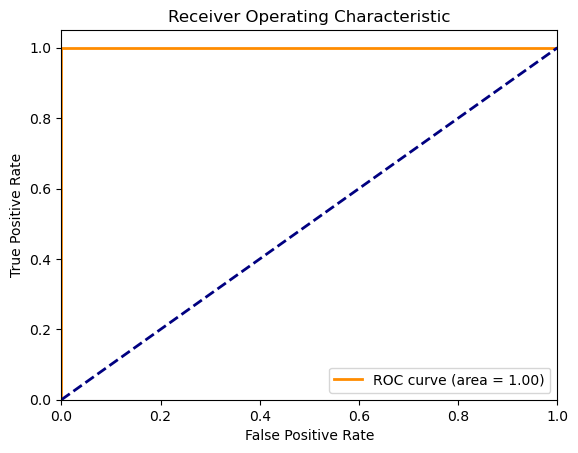

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_encoded and y are your features and target variable
# and using the best estimator directly from the grid search
best_model = grid_search.best_estimator_

# Predict probabilities
y_prob = best_model.predict_proba(X_encoded)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


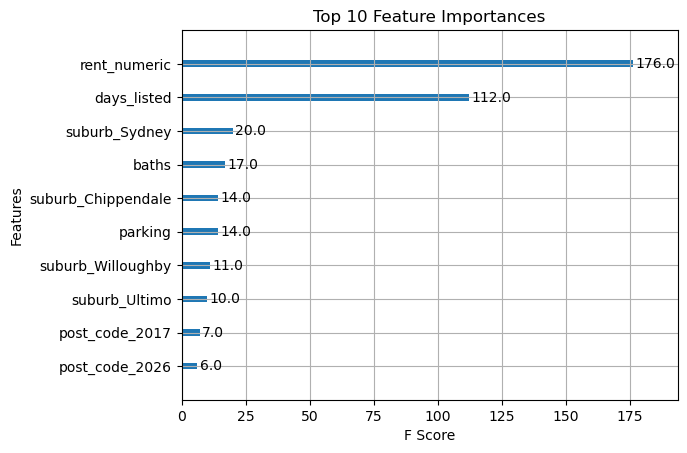

In [36]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming grid_search.best_estimator_ is your best model
best_model = grid_search.best_estimator_

# Plotting feature importances
xgb.plot_importance(best_model, max_num_features=10) # You can adjust max_num_features to show more
plt.title('Top 10 Feature Importances')
plt.ylabel('Features')
plt.xlabel('F Score')
plt.show()


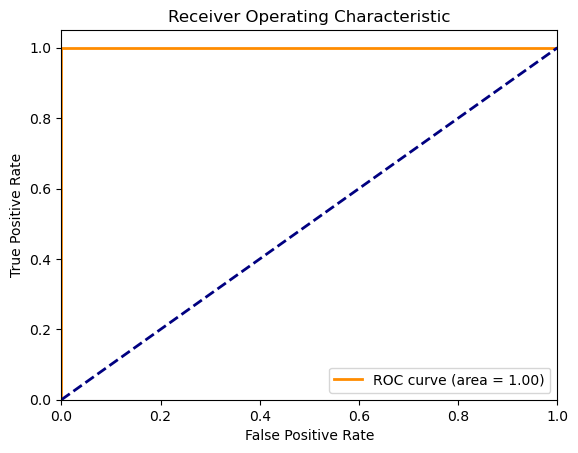

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_encoded and y are your features and target variable respectively
# and grid_search.best_estimator_ is your trained model with the best parameters

# Predict probabilities
y_prob = grid_search.best_estimator_.predict_proba(X_encoded)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


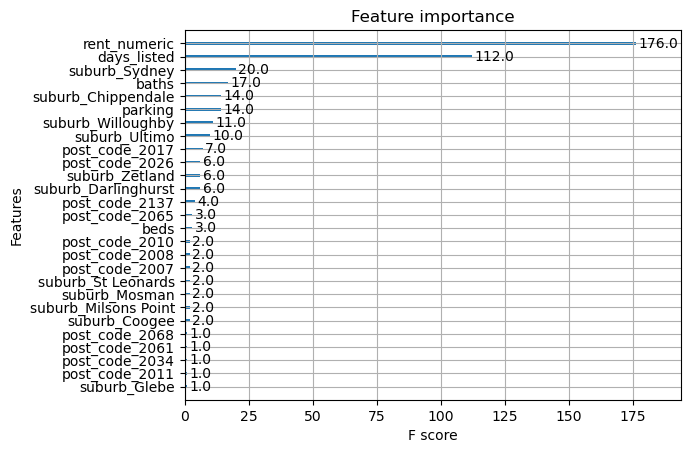

In [38]:
from xgboost import plot_importance

# Assuming grid_search.best_estimator_ is your trained model
model = grid_search.best_estimator_

# Plot feature importance
plot_importance(model)
plt.show()


In [41]:
 y_test = model.predict(X_test)
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [42]:
import pickle

# 假设 `model` 是你训练好的模型
model = model

# 指定你想要保存模型的文件名
filename = 'model.pkl'

# 以二进制写入模式打开文件
with open(filename, 'wb') as file:
    # 使用pickle将模型保存到文件中
    pickle.dump(model, file)

In [44]:
# Assuming 'X_train' is your training DataFrame after one-hot encoding
training_columns = X_train.columns.tolist()
pickle.dump(training_columns, open('training_columns.pkl', 'wb'))
